In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import operator
import timeit
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from matplotlib.pyplot import figure
from scipy.stats import chi2_contingency

from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

In [3]:
start = timeit.default_timer()

DnB_F=pd.read_csv('D:/Xiaoxi/ModelC/Dataset/Model_Transactions_201807_PPSS_deduped_modelc.csv')
DnB_F.head()
DnB_F=pd.DataFrame(DnB_F)

stop = timeit.default_timer()
print ('runing time:',round((stop - start)/60,2),'mins')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


runing time: 1.59 mins


In [4]:
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 50)

In [5]:
DnB_F.columns

Index(['TransactionID', 'PID', 'POWNER', 'SID', 'SOwner', 'Date',
       'RESPONSECOUNT', 'QUALITY_RESPONSECOUNT', 'FUND_CNT', 'NEWMARGIN',
       ...
       'RaAOccProfLicMmbrCnt', 'RaAPPCurrOwnerAircrftMmbrCnt',
       'RaAPropCurrOwnerMmbrCnt', 'RaATeenageMmbrCnt', 'ResCurrMortgageAmount',
       'HHPPCurrOwnedWtrcrftCnt', 'ResCurrAVMValue60Mo', 'PropCurrOwnedAVMTtl',
       'SELECTION_GROUP', 'Firm_offer_flag'],
      dtype='object', length=289)

In [10]:
len(DnB_F)

1943757

In [11]:
DnB_F

,TransactionID,PID,POWNER,SID,SOwner,Date,RESPONSECOUNT,QUALITY_RESPONSECOUNT,FUND_CNT,NEWMARGIN,Dan_Margin,Mix_Margin,Deceased_Retired,RFL,Bad_Data,Non_Healthcare,PrequalCount,7month_INC_consecutivecount_PS,7month_PIECEGRP_consecutivecount_PS,7Month_PIECEGRP_count_PS,7month_transactions_consecutivecount,7month_transactions_consecutivecount_PS,ADDRESS_TYPE,Decile,PlanLogic,DiffDays,FICO,Income_estimator,LEADTYPE,MedicalTitle,MEDICALTITLEGROUP,NEWTU,Num_Business,Num_Home,SENT_12MO,SENT_18MO,SENT_24MO,SENT_3MO,SENT_6MO,Site_type,SPECIALTY,State,Total_Sent_Practitioner,Total_Sent_Site,TU_GROUP,New_Practitioner,New_Site,MailOrder,MODEL,Months_Since_Inq,TU_Date,cemp08BFinscr,eads07Balmag01,eads08Rvlr01,eads08Rvlr02,eads08Rvlr30,eads14At01A,eads14At02S,eads14At06S,eads14At09S,eads14At101B,eads14At101S,eads14At104S,eads14At24S,eads14At28B,eads14At30S,eads14At32S,eads14At33A,eads14At34B,eads14At36S,eads14Atap01,eads14Au101S,eads14Au35S,eads14Bc01S,eads14Bc101S,...,tupsch1Numinq6,CrtRecBkrptCnt,CrtRecBkrptTimeNewest,CrtRecBkrptTimeNewest_spec_flag,CrtRecCnt,CrtRecCnt12Mo,CrtRecEvictionCnt,CrtRecEvictionTimeNewest,CrtRecLienJudgAmtTtl,CrtRecLienJudgTimeNewest_spec_flag,CrtRecSeverityIndex,CrtRecTimeNewest_spec_flag,HHCollege2yrAttendedMmbrCnt,HHCrtRecEvictionMmbrCnt,HHCrtRecLienJudgAmtTtl,HHCrtRecMmbrCnt12Mo,OccBusinessTitleLeadership,OccProfLicenseCategory,RaACrtRecEvictionMmbrCnt,RaACrtRecFelonyMmbrCnt,RaACrtRecMmbrCnt,RaAMedIncomeRange,ResCurrBusinessCnt,DoNotMail,ProspectAge,ProspectBankingExperience,RaAPropOwnerAVMHighest,HHPropCurrOwnedCnt,HHCollegeAttendedMmbrCnt,LifeEvTimeLastMove,CrtRecTimeNewest,PropCurrOwnedCnt,PPCurrOwnedAutoCnt,PropSoldRatio,PropCurrOwnedAssessedTtl,LifeEvTimeLastAssetPurchase,HHCollegeTierMmbrHighest,AssetCurrOwner,PropTimeLastSale,PPCurrOwnedCnt,RaAOccBusinessAssocMmbrCnt,RaACollege2yrAttendedMmbrCnt,LifeEvTimeFirstAssetPurchase,HHPPCurrOwnedAutoCnt,ResInputMortgageAmount,ResInputAVMValue,PropEverOwnedCnt,PPCurrOwnedMtrcycleCnt,PropEverSoldCnt,RaACrtRecMsdmeanMmbrCnt,ResCurrAVMBlockRatio,ProspectGender,RaACollege4yrAttendedMmbrCnt,ResCurrAVMRatioDiff60Mo,RaAPPCurrOwnerWtrcrftMmbrCnt,HHCrtRecMsdmeanMmbrCnt12Mo,ProspectCollegePrivate,CrtRecMsdmeanTimeNewest,PropPurchaseCnt12Mo,RaACrtRecLienJudgAmtMax,HHCollegePrivateMmbrCnt,HHYoungAdultMmbrCnt,HHPPCurrOwnedMtrcycleCnt,HHCollege4yrAttendedMmbrCnt,VerifiedCurrResMatchIndex,RaAOccProfLicMmbrCnt,RaAPPCurrOwnerAircrftMmbrCnt,RaAPropCurrOwnerMmbrCnt,RaATeenageMmbrCnt,ResCurrMortgageAmount,HHPPCurrOwnedWtrcrftCnt,ResCurrAVMValue60Mo,PropCurrOwnedAVMTtl,SELECTION_GROUP,Firm_offer_flag
0,85168214,19138668,VER,7306615.0,VER,2018-06-01,0,0,0,0.0,NaN,NaN,0,0,0,0,0,0.0,0.0,0.0,0,0,Mailing,NaN,10,28.0,NaN,NaN,RPH,RPH,RPH,0,1,0,2,3,3,1,1,2,SECONDARY,TX,8,8,NaN,NaN,NaN,1,C2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,60706026,37800,VTE,10851444.0,VTE,2017-02-27,0,0,0,0.0,NaN,NaN,0,0,0,0,0,9.0,0.0,0.0,0,0,NaN,NaN,11,119.0,NaN,NaN,Vets,DVM,VET,0,0,1,5,7,10,0,1,2,PRIMARY,OH,26,26,NaN,NaN,NaN,1,C2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,1.0,1.0,0.0,0.0,NaN,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,0.0,0.0,43.0,2.0,161709.0,2.0,2.0,201.0,73.0,1.0,1.0,0.0,153890.0,25.0,2.0,1.0,NaN,1.0,1.0,0.0,201.0,1.0,0.0,169105.0,1.0,0.0,0.0,1.0,1.0,F,1.0,1.0,1.0,0.0,0.0,73.0,0.0,518.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,5.0,0.0,0.0,0.0,179375.0,169105.0,NaN,0
2,60753849,12431322,VER,9875098.0,VER,2017-02-06,0,0,0,0.0,NaN,NaN,0,0,0,0,0,NaN,0.0,0.0,0,0,Mailing,NaN,10,364.0,NaN,NaN,RPH,RPH,RPH,0,1,0,1,1,1,0,0,2,SECONDARY,NY,1,1,NaN,NaN,NaN,1,C2,NaN,NaN,N

In [12]:
len(DnB_F.columns)  # 68 columns

289

In [13]:
## Frequency table

print(DnB_F.QUALITY_RESPONSECOUNT.value_counts())
print(DnB_F.FUND_CNT.value_counts())


0    1940409
1       3348
Name: QUALITY_RESPONSECOUNT, dtype: int64
0    1943302
1        455
Name: FUND_CNT, dtype: int64


In [14]:
####### Copy the dataset  ##########################################
DnB_F1=DnB_F.copy()

print (len(DnB_F1))

# ONLY SELECT ADDRESS_TYPE='PRACTICE','Practice','Mailing','TU HOME3'

DnB_F1=DnB_F1[DnB_F1['ADDRESS_TYPE'].isin(['PRACTICE','Practice','Mailing','TU HOME3','FA BUSINESS','CPA BUSINESS'])]

DnB_F1=DnB_F1[DnB_F1['SPECIALTY'].isin(['PRIMARY','SECONDARY','BHG PRO'])]


DnB_F1['ADDRESS_TYPE'].replace('PRACTICE','Practice',inplace=True)

print('Filter ADDRESS_TYPE AND SPECIALTY:',len(DnB_F1))

1943757
Filter ADDRESS_TYPE AND SPECIALTY: 1693341


In [15]:
DnB_F1.FICO.count()

341109

In [16]:
DnB_F1.ADDRESS_TYPE.value_counts()

Mailing         1131869
Practice         453284
FA BUSINESS       83386
CPA BUSINESS      24802
Name: ADDRESS_TYPE, dtype: int64

## Recoding Medical_title and CHIEF_EXECUTIVE_OFFICER_-_TITLE_r

In [309]:
####  MedicalTitle Recode using MedicalTitle Group ####

# DnB_F1.MedicalTitle.value_counts()
# pd.crosstab(DnB_F1['MedicalTitle'], columns="count")

In [17]:
def Medical_title(series):
  
    if series in (['DO','DPM','OD']):
        return 'MD'
    elif series in (['DMD','DN','DENT']):
        return 'DDS'
    elif series in(['DVM','VMD','VET']):
        return 'VET'
    elif series in (['APRN','LPN','TRN']):
        return 'RN'
    elif series in (['PharmD','PHARMD']):
        return 'RPH'
    elif series in (['ANP','ARNP','CNP','CPNP','CRNP','FNP','GNP','PNP','WHNP']):
        return 'NP'
    elif series in (['PAC']):
        return 'PA'  
    elif series in (['ND']):
        return 'DC'
    elif series in (['PSO']):
        return 'PSYD'
    else:
        return series

In [18]:
## Create MedicalTitle into MedicalTitleGroup

DnB_F1['MedicalTitleGroup'] = DnB_F1['MedicalTitle'].apply(Medical_title)

DnB_F1['MedicalTitleGroup'].value_counts()

MD      777724
NP      191990
RPH     186307
DDS     177947
FA       82743
PA       71003
PT       65770
SLP      60964
CPA      25406
OT       19143
CRNA     17836
VET       8033
RDH       7900
PHD        265
PSYD       143
IA         117
PsyD        34
RN           7
ATY          5
DPSM         2
CFO          1
LCP          1
Name: MedicalTitleGroup, dtype: int64

In [19]:
def Medical_title_group_reduce(series):
  
    if series in (['MD']):
        return 'MD'
    elif series in(['NP']):
        return 'NP'    
    elif series in (['RPH']):
        return 'RPH'
    elif series in (['DDS']):
        return 'DDS'
    elif series in (['FA']):
        return 'FA'
    elif series in (['PA']):
        return 'PA'  
    elif series in (['PT']):
        return 'PT'    
    elif series in (['SLP']):
        return 'SLP'
    elif series in (['CPA']):
        return 'CPA'  
    elif series in (['OT']):
        return 'OT'
    elif series in (['CRNA']):
        return 'CRNA'
    else:
        return 'OTHER'

In [20]:
DnB_F1['MedicalTitleGroup_r'] = DnB_F1['MedicalTitleGroup'].apply(Medical_title_group_reduce)
DnB_F1['MedicalTitleGroup_r'].value_counts()

MD       777724
NP       191990
RPH      186307
DDS      177947
FA        82743
PA        71003
PT        65770
SLP       60964
CPA       25406
OT        19143
CRNA      17836
OTHER     16508
Name: MedicalTitleGroup_r, dtype: int64

In [21]:
def Region(series):
  
    if series in (['CA','NV','UT','CO','WY','ID','MT','WA','OR','AK','HI']):
        return 'west'
    elif series in(['AZ','NM','TX','OK']):
        return 'southwest'    
    elif series in (['ND','SD','NE','KS','MN','IA','MO','WI','IL','MI','IN','OH']):
        return 'midwest'
    elif series in (['MD','PA','NY','NJ','CT','RI','MA','NH','VT','ME']):
        return 'northeast'
    elif series in (['AR','LA','MS','AL','TN','KY','GA','FL','SC','NC','VA','DC','WV','DE']):
        return 'southeast'

In [22]:
DnB_F1['Region'] = DnB_F1['State'].apply(Region)
DnB_F1['Region'].value_counts()

southeast    421073
northeast    402497
midwest      377849
west         310625
southwest    181294
Name: Region, dtype: int64

In [23]:
def Recode3(series):
  
    if series <=2:
        return series
    elif series >2:
        return 

In [24]:
def Recode4(series):
  
    if series <=3:
        return series
    elif series >3:
        return 4

In [25]:
def Recode5(series):
  
    if series <=4:
        return series
    elif series >4:
        return 5

In [26]:
def Recode7(series):
  
    if series <=6:
        return series
    elif series >6:
        return 7

In [27]:
DnB_F1['Num_Business_r']=DnB_F1['Num_Business'].apply(Recode3)
DnB_F1['Num_Home_r']=DnB_F1['Num_Home'].apply(Recode3)
DnB_F1['SENT_3MO_r']=DnB_F1['SENT_3MO'].apply(Recode3)
DnB_F1['SENT_6MO_r']=DnB_F1['SENT_6MO'].apply(Recode4)
DnB_F1['SENT_12MO_r']=DnB_F1['SENT_12MO'].apply(Recode5)
DnB_F1['SENT_18MO_r']=DnB_F1['SENT_18MO'].apply(Recode5)
DnB_F1['SENT_24MO_r']=DnB_F1['SENT_24MO'].apply(Recode5)
DnB_F1['Total_Sent_Practitioner_r']=DnB_F1['Total_Sent_Practitioner'].apply(Recode7)
DnB_F1['Total_Sent_Site_r']=DnB_F1['Total_Sent_Site'].apply(Recode7)

In [28]:
DnB_F1['FICO_r']=pd.qcut(DnB_F1['FICO'], q=10,duplicates='drop',labels=[1,2,3,4,5,6,7,8,9,10])

In [29]:
#col_y = ['QUALITY_RESPONSECOUNT']  
col_y = ['FUND_CNT'] 

In [30]:
# Create category and continous variable for MODEL

col_categ=[
'MedicalTitle',
'MedicalTitleGroup',
'MedicalTitleGroup_r',
'SPECIALTY',
'TU_GROUP',
#'Previous_TU_GROUP',
'Decile',
'ADDRESS_TYPE',
'Site_type',
#'SiteFirstUse',
'Region',
#'Date',
#'LastTransactionDate',
#'LastTransaction_Days',
#'MailOrder',
#'Total_SENT_Month',
'NEWTU',
#'Shipping',
#'Product',
#'Sent',
#'RFL',
#'Bad_Data',
#'Non_HealthCare',
'MODEL',
'New_Practitioner',
'New_Site',
'FICO_r',
]

In [31]:
col_contin=[
'Num_Home_r',
'Num_Business_r',
'Total_Sent_Practitioner_r',
'Total_Sent_Site_r',
'SENT_3MO_r',
'SENT_6MO_r',
'SENT_12MO_r',
'SENT_18MO_r',
'SENT_24MO_r',
#'FICO_r',
'FICO'
 ]

In [32]:
print('col_categ', col_categ)
print('******************************************************************************************************')
print('col_contin', col_contin)

#DnB_F1[col_categ].describe(include=[np.object])
#DnB_F1[col_contin].describe()

col_categ ['MedicalTitle', 'MedicalTitleGroup', 'MedicalTitleGroup_r', 'SPECIALTY', 'TU_GROUP', 'Decile', 'ADDRESS_TYPE', 'Site_type', 'Region', 'NEWTU', 'MODEL', 'New_Practitioner', 'New_Site', 'FICO_r']
******************************************************************************************************
col_contin ['Num_Home_r', 'Num_Business_r', 'Total_Sent_Practitioner_r', 'Total_Sent_Site_r', 'SENT_3MO_r', 'SENT_6MO_r', 'SENT_12MO_r', 'SENT_18MO_r', 'SENT_24MO_r', 'FICO']


In [33]:
# print(DnB_F[col_contin].isnull().sum())  # Count missing value
print('******************************************************************************************************')
print(DnB_F1[col_contin].isnull().sum())  # Count missing value
print('******************************************************************************************************')
print(DnB_F1[col_categ].isnull().sum())  # Count missing value

******************************************************************************************************
Num_Home_r                      5270
Num_Business_r                 85195
Total_Sent_Practitioner_r          0
Total_Sent_Site_r                  0
SENT_3MO_r                     77622
SENT_6MO_r                         0
SENT_12MO_r                        0
SENT_18MO_r                        0
SENT_24MO_r                        0
FICO                         1352232
dtype: int64
******************************************************************************************************
MedicalTitle                 0
MedicalTitleGroup            0
MedicalTitleGroup_r          0
SPECIALTY                    0
TU_GROUP               1356706
Decile                 1663402
ADDRESS_TYPE                 0
Site_type                    0
Region                       3
NEWTU                        0
MODEL                        0
New_Practitioner       1487731
New_Site               1380679
FICO_r  

In [34]:
pd.crosstab(pd.cut(DnB_F1['NEWMARGIN'],bins=5),DnB_F1['FUND_CNT'],dropna=False)

FUND_CNT,0,1
NEWMARGIN,,
"(-5677.595, 12705.824]",1692965,250
"(12705.824, 30997.784]",0,98
"(30997.784, 49289.744]",0,19
"(49289.744, 67581.704]",0,6
"(67581.704, 85873.663]",0,3


In [35]:
## Make copy of dataset to aviod issue

DnB_F1_contin =DnB_F1[col_contin].copy()
DnB_F1_categ = DnB_F1[col_categ].copy()

## Concatenating dataframes together by columns

#DnB_F_model=pd.concat([DnB_F1_contin,DnB_F1_categ,DnB_F1['FUND_CNT'],DnB_F1['QUALITY_RESPONSECOUNT']],axis=1)    
DnB_F_model=pd.concat([DnB_F1_contin,DnB_F1_categ,DnB_F1['QUALITY_RESPONSECOUNT'],DnB_F1['FUND_CNT'],DnB_F1['NEWMARGIN'],DnB_F1['PID'],DnB_F1['POWNER']],axis=1)

In [36]:
DnB_F1['tr_year'] = pd.DatetimeIndex(DnB_F1['Date']).year
DnB_F1['tr_month'] = pd.DatetimeIndex(DnB_F1['Date']).month
DnB_F1['tr_day'] = pd.DatetimeIndex(DnB_F1['Date']).day

In [37]:
DnB_F1['tr_year'].value_counts()

2017    911439
2018    781902
Name: tr_year, dtype: int64

In [38]:
pd.crosstab(DnB_F1['tr_year'],DnB_F1['tr_month'])

tr_month,1,2,3,4,5,6,7,8,9,10,11,12
tr_year,,,,,,,,,,,,
2017,60413,111017,39256,17066,24823,54110,66870,76167,145803,131371,129014,55529
2018,30835,85525,141752,117000,134730,196128,75932,0,0,0,0,0


In [70]:
# seperate data into 2016.6 and 2018.1-3 to predict 2018.4-7

df_modelc_P1 = DnB_F_model[(DnB_F1.tr_year == 2016)]
df_modelc_P2 = DnB_F_model[(DnB_F1.tr_year == 2017)]
df_modelc_P3 = DnB_F_model[(DnB_F1.tr_year == 2018) & (DnB_F1.tr_month<=5)]

df_modelc_P=pd.concat([df_modelc_P1,df_modelc_P2,df_modelc_P3]) # Concatenating two dataframe together by rows

df_modelc_P_201804 = DnB_F_model[(DnB_F1.tr_year == 2018) & (DnB_F1.tr_month==4)]
df_modelc_P_201805 = DnB_F_model[(DnB_F1.tr_year == 2018) & (DnB_F1.tr_month==5)]
df_modelc_P_201806 = DnB_F_model[(DnB_F1.tr_year == 2018) & (DnB_F1.tr_month==6)]
df_modelc_P_201807 = DnB_F_model[(DnB_F1.tr_year == 2018) & (DnB_F1.tr_month==7)]


In [71]:
# save python dataframe into csv

df_modelc_P.to_csv('D:/Xiaoxi/ModelC/Dataset/csv/GBM/df_modelc_P_frequency_p.csv')

df_modelc_P_201804.to_csv('D:/Xiaoxi/ModelC/Dataset/csv/GBM/df_modelc_P_201804_frequency_p.csv')
df_modelc_P_201805.to_csv('D:/Xiaoxi/ModelC/Dataset/csv/GBM/df_modelc_P_201805_frequency_p.csv')
df_modelc_P_201806.to_csv('D:/Xiaoxi/ModelC/Dataset/csv/GBM/df_modelc_P_201806_frequency_p.csv')
df_modelc_P_201807.to_csv('D:/Xiaoxi/ModelC/Dataset/csv/GBM/df_modelc_P_201807_frequency_p.csv')


## H2O

In [42]:
import h2o
# Initialize H2O using h2o.init().
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 day 3 hours 17 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,10 months and 15 days !!!
H2O cluster name:,H2O_from_python_xiaoxima_0y9qxs
H2O cluster total nodes:,1
H2O cluster free memory:,24.22 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [72]:
# read dataset from csv

h2o_df_P=h2o.import_file('D:/Xiaoxi/ModelC/Dataset/csv/GBM/df_modelc_P_frequency_p.csv')

h2o_df_P_201804=h2o.import_file('D:/Xiaoxi/ModelC/Dataset/csv/GBM/df_modelc_P_201804_frequency_p.csv')
h2o_df_P_201805=h2o.import_file('D:/Xiaoxi/ModelC/Dataset/csv/GBM/df_modelc_P_201805_frequency_p.csv')
h2o_df_P_201806=h2o.import_file('D:/Xiaoxi/ModelC/Dataset/csv/GBM/df_modelc_P_201806_frequency_p.csv')
h2o_df_P_201807=h2o.import_file('D:/Xiaoxi/ModelC/Dataset/csv/GBM/df_modelc_P_201807_frequency_p.csv')


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [73]:
# DnB_F_model 
DnB_F_model.to_csv('D:/Xiaoxi/ModelC/Dataset/csv/GBM/df_modelc_frequency_p.csv')

# Create H2O dataset

h2o_DnB_F_model=h2o.import_file('D:/Xiaoxi/ModelC/Dataset/csv/GBM/df_modelc_frequency_p.csv')

h2o_DnB_F_model_df=h2o_DnB_F_model.as_data_frame()  

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [74]:
# Change data type

for i in col_categ: 
    h2o_df_P[i] = h2o_df_P[i].asfactor()
    h2o_df_P_201804[i] = h2o_df_P_201804[i].asfactor()
    h2o_df_P_201805[i] = h2o_df_P_201805[i].asfactor()
    h2o_df_P_201806[i] = h2o_df_P_201806[i].asfactor()
    h2o_df_P_201807[i] = h2o_df_P_201807[i].asfactor()
    
for i in col_contin: 
    h2o_df_P[i] = h2o_df_P[i].asnumeric()
    h2o_df_P_201804[i] = h2o_df_P_201804[i].asnumeric()
    h2o_df_P_201805[i] = h2o_df_P_201805[i].asnumeric()
    h2o_df_P_201806[i] = h2o_df_P_201806[i].asnumeric()
    h2o_df_P_201807[i] = h2o_df_P_201807[i].asnumeric()
    
### transfer h2o dataset into pd.dataframe new dataset

h2o_df_P_df=h2o_df_P.as_data_frame()   
 
h2o_df_P_201804_df=h2o_df_P_201804.as_data_frame()  
h2o_df_P_201805_df=h2o_df_P_201805.as_data_frame() 
h2o_df_P_201806_df=h2o_df_P_201806.as_data_frame()    
h2o_df_P_201807_df=h2o_df_P_201807.as_data_frame()     

In [46]:
col_categ1=[
#'MedicalTitleGroup',
'MedicalTitleGroup_r',
'SPECIALTY',
'TU_GROUP',
#'Previous_TU_GROUP',
'Decile',
'ADDRESS_TYPE',
'Site_type',
'Region',
#'LastTransaction_Days',
#'MailOrder',
#'Total_SENT_Month',
#'NEWTU',
#'Shipping',
#'Product',
#'Sent',
#'RFL',
# 'Bad_Data',
#'Non_HealthCare',
'MODEL',
'New_Practitioner',
'New_Site',
'FICO_r'
]


In [47]:
col_contin1=[
'Num_Home_r',
'Num_Business_r',
'Total_Sent_Practitioner_r',
'Total_Sent_Site_r',
'SENT_3MO_r',
'SENT_6MO_r',
'SENT_12MO_r',
'SENT_18MO_r',
'SENT_24MO_r',
#'FICO_r'
#'FICO'
 ]

In [48]:
#col_select1 =  col_contin1  + col_categ1+ col_y  
col_select1 =  col_contin1  + col_categ1+ col_y  

In [49]:
#y_column = 'QUALITY_RESPONSECOUNT'
y_column = 'FUND_CNT'


X_columns_a =  col_select1.copy()   
#X_columns_a.remove('QUALITY_RESPONSECOUNT')
X_columns_a.remove('FUND_CNT')

X_columns = X_columns_a

train = h2o_df_P
#train[ 'QUALITY_RESPONSECOUNT'] = train[ 'QUALITY_RESPONSECOUNT'].asfactor()
train[ 'FUND_CNT'] = train[ 'FUND_CNT'].asfactor()
print('train shape', train.shape) 

#y = 'QUALITY_RESPONSECOUNT'
y = 'FUND_CNT'
x = X_columns
x

train shape (1421281, 30)


['Num_Home_r',
 'Num_Business_r',
 'Total_Sent_Practitioner_r',
 'Total_Sent_Site_r',
 'SENT_3MO_r',
 'SENT_6MO_r',
 'SENT_12MO_r',
 'SENT_18MO_r',
 'SENT_24MO_r',
 'MedicalTitleGroup_r',
 'SPECIALTY',
 'TU_GROUP',
 'Decile',
 'ADDRESS_TYPE',
 'Site_type',
 'Region',
 'MODEL',
 'New_Practitioner',
 'New_Site',
 'FICO_r']

## GLM Logistic Regression with Lasso regularization 

In [52]:
glm_model = H2OGeneralizedLinearEstimator(family= "binomial",
                                          alpha=1,
                                          #lambda_=0.000086,
                                          lambda_search = True, 
                                          #balance_classes=True,
                                          #missing_values_handling="mean_imputation",
                                          #compute_p_values = True,#(this is avalible when regularization is disabled lambda=0) 
                                          remove_collinear_columns=True)

                                          # lambda_search = True, alpha=1 (Lasso penalties) 

########v Validation and Train data  #############################

traindata, valid = train.split_frame(ratios = [.7],seed = 12345)

glm_model.train(x , y, training_frame = traindata, validation_frame = valid)

glm_model

glm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1536067346034_10473


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.00024207638611900244
RMSE: 0.01555880413524775
LogLoss: 0.002147980625975923
Null degrees of freedom: 994925
Residual degrees of freedom: 994890
Null deviance: 4494.8936913493035
Residual deviance: 4274.163544559434
AIC: 4346.163544559434
AUC: 0.7439047750411696
Gini: 0.48780955008233917
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0030433336030471036: 


,0,1,Error,Rate
0,994073.0,612.0,0.0006,(612.0/994685.0)
1,236.0,5.0,0.9793,(236.0/241.0)
Total,994309.0,617.0,0.0009,(848.0/994926.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0030433,0.0116550,59.0
max f2,0.0027725,0.0168824,65.0
max f0point5,0.0063198,0.0121065,17.0
max accuracy,0.0206930,0.9997568,0.0
max precision,0.0063198,0.0232558,17.0
max recall,0.0000550,1.0,384.0
max specificity,0.0206930,0.9999990,0.0
max absolute_mcc,0.0009171,0.0159950,163.0
max min_per_class_accuracy,0.0002400,0.6721992,298.0
max mean_per_class_accuracy,0.0003124,0.6880644,275.0


Gains/Lift Table: Avg response rate:  0.02 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100058,0.0013369,10.3674627,10.3674627,0.0025113,0.0025113,0.1037344,0.1037344,936.7462711,936.7462711
,2,0.0200517,0.0010805,4.9564666,7.6565401,0.0012006,0.0018546,0.0497925,0.1535270,395.6466615,665.6540105
,3,0.0300575,0.0008858,4.5616836,6.6263011,0.0011050,0.0016051,0.0456432,0.1991701,356.1683593,562.6301129
,4,0.0400472,0.0007807,2.4921966,5.5950577,0.0006037,0.0013553,0.0248963,0.2240664,149.2196590,459.5057654
,5,0.0500520,0.0006953,3.7326615,5.2227879,0.0009042,0.0012651,0.0373444,0.2614108,273.2661529,422.2787864
,6,0.1000215,0.0004886,2.3250676,3.7751216,0.0005632,0.0009144,0.1161826,0.3775934,132.5067629,277.5121614
,7,0.1500011,0.0003879,1.5774072,3.0428545,0.0003821,0.0007371,0.0788382,0.4564315,57.7407179,204.2854474
,8,0.2009818,0.0003300,2.1161708,2.8077936,0.0005126,0.0006801,0.1078838,0.5643154,111.6170793,180.7793564
,9,0.3000002,0.0002488,0.7961971,2.1438437,0.0001929,0.0005193,0.0788382,0.6431535,-20.3802942,114.3843653
,10,0.4000016,0.0002024,0.9543434,1.8464656,0.0002312,0.0004473,0.0954357,0.7385892,-4.5656582,84.6465606




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.00023442258194029185
RMSE: 0.015310864833192534
LogLoss: 0.0021024331255811908
Null degrees of freedom: 426354
Residual degrees of freedom: 426319
Null deviance: 1871.653060847464
Residual deviance: 1792.765750514333
AIC: 1864.765750514333
AUC: 0.7250451607605776
Gini: 0.45009032152115513
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0013084964100680962: 


,0,1,Error,Rate
0,421294.0,4961.0,0.0116,(4961.0/426255.0)
1,87.0,13.0,0.87,(87.0/100.0)
Total,421381.0,4974.0,0.0118,(5048.0/426355.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0013085,0.0051242,113.0
max f2,0.0013085,0.0120953,113.0
max f0point5,0.0013085,0.0032507,113.0
max accuracy,0.0191365,0.9997631,0.0
max precision,0.0013085,0.0026136,113.0
max recall,0.0000185,1.0,396.0
max specificity,0.0191365,0.9999977,0.0
max absolute_mcc,0.0010815,0.0195037,135.0
max min_per_class_accuracy,0.0002361,0.6693834,295.0
max mean_per_class_accuracy,0.0002227,0.6783435,301.0


Gains/Lift Table: Avg response rate:  0.02 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100175,0.0013369,7.9860454,7.9860454,0.0018731,0.0018731,0.08,0.08,698.6045423,698.6045423
,2,0.0200091,0.0010813,11.0091667,9.4956570,0.0025822,0.0022272,0.11,0.19,1000.9166667,849.5657016
,3,0.0300266,0.0008876,2.9947670,7.3268317,0.0007024,0.0017185,0.03,0.22,199.4767033,632.6831745
,4,0.0400417,0.0007860,2.9954684,6.2434835,0.0007026,0.0014644,0.03,0.25,199.5468384,524.3483482
,5,0.0500029,0.0007016,4.0155875,5.7996599,0.0009418,0.0013603,0.04,0.29,301.5587474,479.9659928
,6,0.1000059,0.0004915,1.1999296,3.4997948,0.0002814,0.0008209,0.06,0.35,19.9929640,249.9794784
,7,0.1501003,0.0003901,1.5969847,2.8647517,0.0003746,0.0006719,0.08,0.43,59.6984736,186.4751703
,8,0.2017919,0.0003300,1.5476383,2.5273557,0.0003630,0.0005928,0.08,0.51,54.7638278,152.7355727
,9,0.3000035,0.0002489,1.1200308,2.0666424,0.0002627,0.0004847,0.11,0.62,12.0030807,106.6642430
,10,0.4000516,0.0002025,1.0994714,1.8247646,0.0002579,0.0004280,0.11,0.73,9.9471352,82.4764604



Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2018-09-05 12:42:19,0.000 sec,1,.96E-4,1,0.0045178,0.0043899
,2018-09-05 12:42:19,0.109 sec,2,.88E-4,3,0.0045107,0.0043817
,2018-09-05 12:42:19,0.203 sec,3,.8E-4,3,0.0045041,0.0043739
,2018-09-05 12:42:19,0.281 sec,4,.73E-4,4,0.0044951,0.0043642
,2018-09-05 12:42:20,0.406 sec,5,.66E-4,4,0.0044868,0.0043553
---,---,---,---,---,---,---,---
,2018-09-05 12:42:26,6.950 sec,57,.84E-6,40,0.0042937,0.0042051
,2018-09-05 12:42:26,7.141 sec,58,.76E-6,41,0.0042916,0.0042056
,2018-09-05 12:42:26,7.313 sec,59,.7E-6,43,0.0042897,0.0042066
,2018-09-05 12:42:27,7.442 sec,60,.63E-6,43,0.0042873,0.0042081



See the whole table with table.as_data_frame()


In [53]:
glm_coefficient=glm_model._model_json['output']['coefficients_table'].as_data_frame()   # some variables are penalties to 0
glm_coefficient

glm_coefficient[(glm_coefficient.standardized_coefficients!=0)]

,names,coefficients,standardized_coefficients
0,Intercept,-8.347530,-8.710301
1,MedicalTitleGroup_r.CPA,-0.577560,-0.577560
3,MedicalTitleGroup_r.DDS,0.251930,0.251930
4,MedicalTitleGroup_r.FA,-2.864207,-2.864207
6,MedicalTitleGroup_r.NP,1.234320,1.234320
7,MedicalTitleGroup_r.OT,-0.362433,-0.362433
10,MedicalTitleGroup_r.PT,-0.390161,-0.390161
11,MedicalTitleGroup_r.RPH,0.562115,0.562115
17,Decile.5,0.067685,0.067685
24,FICO_r.2,-0.239877,-0.239877


In [54]:
glm_coefficient_nonezero=glm_coefficient[(glm_coefficient.standardized_coefficients!=0)][1:].names   
print('Not unique nonezero variable:',glm_coefficient_nonezero.count())
glm_coefficient_nonezero

Not unique nonezero variable: 35


1       MedicalTitleGroup_r.CPA
3       MedicalTitleGroup_r.DDS
4        MedicalTitleGroup_r.FA
6        MedicalTitleGroup_r.NP
7        MedicalTitleGroup_r.OT
10       MedicalTitleGroup_r.PT
11      MedicalTitleGroup_r.RPH
17                     Decile.5
24                     FICO_r.2
27                     FICO_r.5
28                     FICO_r.6
29                     FICO_r.7
31                     FICO_r.9
32                    FICO_r.10
33                   TU_GROUP.1
35                   TU_GROUP.3
37                   TU_GROUP.5
38                   TU_GROUP.6
40               Region.midwest
41             Region.northeast
43             Region.southwest
44                  Region.west
46     ADDRESS_TYPE.FA BUSINESS
48        ADDRESS_TYPE.Practice
51          SPECIALTY.SECONDARY
55                     MODEL.C1
56                     MODEL.C2
57                   Num_Home_r
58               Num_Business_r
59    Total_Sent_Practitioner_r
60            Total_Sent_Site_r
61      

In [55]:
unique_list=set(glm_coefficient_nonezero.str.split('.',expand=True)[0])
print('Unique Variable count:',len(unique_list))
unique_list

Unique Variable count: 16


{'ADDRESS_TYPE',
 'Decile',
 'FICO_r',
 'MODEL',
 'MedicalTitleGroup_r',
 'Num_Business_r',
 'Num_Home_r',
 'Region',
 'SENT_18MO_r',
 'SENT_24MO_r',
 'SENT_3MO_r',
 'SENT_6MO_r',
 'SPECIALTY',
 'TU_GROUP',
 'Total_Sent_Practitioner_r',
 'Total_Sent_Site_r'}

## Predict

### In time validation

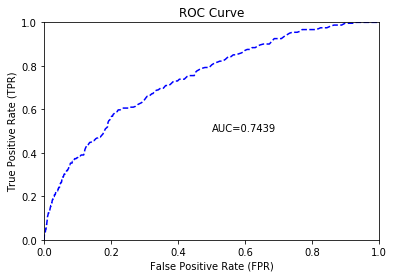

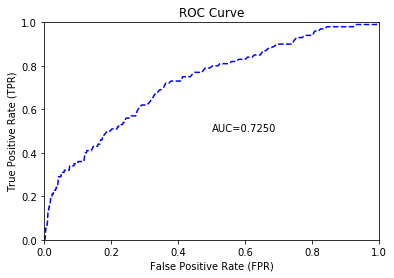

In [56]:
perf_glm=glm_model.model_performance(train=True)  # Train ROC AUC 0.7147
perf_glm_valid =glm_model.model_performance(valid)  # Valid ROC AUC 0.6487

perf_glm.plot()
perf_glm_valid.plot()

## Out of time validation

In [57]:
## Self definition to give AUC and KS

def AUC_KS (True_label,Pred_Prob):
    auc=metrics.roc_auc_score(True_label,Pred_Prob)
    print ('\033[1m','AUC is:', round(auc,6))
    fpr, tpr, thresholds = metrics.roc_curve(True_label, Pred_Prob, pos_label=1)
    print('\033[1m','KS is:',round(max(tpr-fpr),5)) 
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    return

## Self definition to give MAPE for Response Rate

def MAPE(data):
    data_sort=data.sort_values('p1', ascending=False)
    data_sort['bucket']= pd.qcut(data_sort.p1,10, duplicates='drop')  
    grouped = data_sort.groupby('bucket', as_index = False)
    agg=pd.DataFrame(grouped.mean().p1)
    agg=agg.sort_values('p1', ascending = False)
    agg['positive']=grouped.sum().FUND_CNT
    agg['total']=grouped.count().FUND_CNT
    agg['one_rate']=agg['positive']/agg['total']
    agg.columns=['y_pred','n_positives','total','one_rate']
    agg['abs_error']=(abs(agg['one_rate']-agg['y_pred'])/agg['one_rate'])/10
    MAPE=agg.abs_error.sum()
    print ('\033[1m','MAPE is',round(MAPE,6))
    return agg


def Margin(data):
    data_sort=data.sort_values('p1', ascending=False)
    data_sort['bucket']= pd.qcut(data_sort.p1,10, duplicates='drop')  
    grouped = data_sort.groupby('bucket', as_index = False)
    agg=pd.DataFrame(grouped.mean().p1)
    agg=agg.sort_values('p1', ascending = False)
    agg['NEWMARGIN']=round(grouped.sum().NEWMARGIN,1)
    agg['cumMargin']=round(agg['NEWMARGIN'].cumsum(),1)
    agg['Percent']=round((agg['NEWMARGIN']/agg['NEWMARGIN'].sum()).cumsum(),3)
  
    return agg

#### 201804

In [75]:
pred_201804=glm_model.predict(h2o_df_P_201804).as_data_frame()

AUC_KS(h2o_df_P_201804_df['FUND_CNT'],pred_201804[['p1']])

data_201804=pd.concat([h2o_df_P_201804_df['FUND_CNT'],pred_201804[['p1']]],axis=1) 

MAPE(data_201804)


glm prediction progress: |████████████████████████████████████████████████| 100%
 AUC is: 0.794925
 KS is: 0.55236
 MAPE is inf


,y_pred,n_positives,total,one_rate,abs_error
9,0.000730,7,11306,0.000619,0.017957
8,0.000370,7,11694,0.000599,0.038198
7,0.000294,1,12094,0.000083,0.255540
6,0.000238,1,7778,0.000129,0.085399
5,0.000203,0,15546,0.000000,inf
4,0.000143,1,11663,0.000086,0.067298
3,0.000112,0,11697,0.000000,inf
2,0.000090,1,11818,0.000085,0.006541
1,0.000070,0,11677,0.000000,inf
0,0.000046,1,11727,0.000085,0.046484


In [76]:
Margin(pd.concat([h2o_df_P_201804_df['FUND_CNT'],pred_201804[['p1']],h2o_df_P_201804_df['NEWMARGIN']],axis=1) )

,p1,NEWMARGIN,cumMargin,Percent
9,0.000730,118677.6,118677.6,0.439
8,0.000370,77036.0,195713.6,0.724
7,0.000294,7910.9,203624.5,0.753
6,0.000238,25285.5,228910.0,0.846
5,0.000203,0.0,228910.0,0.846
4,0.000143,23157.5,252067.5,0.932
3,0.000112,0.0,252067.5,0.932
2,0.000090,6651.6,258719.1,0.957
1,0.000070,0.0,258719.1,0.957
0,0.000046,11728.1,270447.2,1.000


#### 201805

In [77]:
pred_201805=glm_model.predict(h2o_df_P_201805).as_data_frame()

AUC_KS(h2o_df_P_201805_df['FUND_CNT'],pred_201805[['p1']])

data_201805=pd.concat([h2o_df_P_201805_df['FUND_CNT'],pred_201805[['p1']]],axis=1) 

MAPE(data_201805)

glm prediction progress: |████████████████████████████████████████████████| 100%
 AUC is: 0.729007
 KS is: 0.41241
 MAPE is inf


,y_pred,n_positives,total,one_rate,abs_error
9,0.000464,9,13473,0.000668,0.030547
8,0.000262,2,13236,0.000151,0.073566
7,0.000201,2,12624,0.000158,0.026914
6,0.000164,2,14552,0.000137,0.019440
5,0.000134,1,13462,0.000074,0.080379
4,0.000111,0,11017,0.000000,inf
3,0.000097,4,15761,0.000254,0.061867
2,0.000077,1,11407,0.000088,0.011762
1,0.000066,0,15699,0.000000,inf
0,0.000046,0,13499,0.000000,inf


In [78]:
Margin(pd.concat([h2o_df_P_201805_df['FUND_CNT'],pred_201805[['p1']],h2o_df_P_201805_df['NEWMARGIN']],axis=1) )

,p1,NEWMARGIN,cumMargin,Percent
9,0.000464,63899.3,63899.3,0.193
8,0.000262,21822.8,85722.1,0.259
7,0.000201,89259.2,174981.3,0.528
6,0.000164,43460.7,218442.0,0.659
5,0.000134,11785.5,230227.5,0.695
4,0.000111,0.0,230227.5,0.695
3,0.000097,98276.8,328504.3,0.991
2,0.000077,2918.7,331423.0,1.000
1,0.000066,0.0,331423.0,1.000
0,0.000046,0.0,331423.0,1.000


#### 201806

In [62]:
pred_201806=glm_model.predict(h2o_df_P_201806).as_data_frame()

AUC_KS(h2o_df_P_201806_df['FUND_CNT'],pred_201806[['p1']])

data_201806=pd.concat([h2o_df_P_201806_df['FUND_CNT'],pred_201806[['p1']]],axis=1) 

MAPE(data_201806)

glm prediction progress: |████████████████████████████████████████████████| 100%
 AUC is: 0.687435
 KS is: 0.3286
 MAPE is 0.345022


,y_pred,n_positives,total,one_rate,abs_error
9,0.000403,7,19612,0.000357,0.013023
8,0.000238,3,19540,0.000154,0.054743
7,0.000190,5,19671,0.000254,0.025336
6,0.000159,3,19624,0.000153,0.003842
5,0.000134,2,19617,0.000102,0.030995
4,0.000116,2,19330,0.000103,0.011661
3,0.000100,1,19826,0.000050,0.098989
2,0.000085,1,18914,0.000053,0.061230
1,0.000071,1,20283,0.000049,0.043674
0,0.000050,1,19711,0.000051,0.001527


In [63]:
Margin(pd.concat([h2o_df_P_201806_df['FUND_CNT'],pred_201806[['p1']],h2o_df_P_201806_df['NEWMARGIN']],axis=1) )

,p1,NEWMARGIN,cumMargin,Percent
9,0.000403,126570.1,126570.1,0.333
8,0.000238,47537.2,174107.3,0.458
7,0.000190,116394.5,290501.8,0.764
6,0.000159,23836.8,314338.6,0.826
5,0.000134,6290.0,320628.6,0.843
4,0.000116,12006.2,332634.8,0.874
3,0.000100,8188.9,340823.7,0.896
2,0.000085,3756.9,344580.6,0.906
1,0.000071,21073.7,365654.3,0.961
0,0.000050,14783.2,380437.5,1.000


#### 201807

In [64]:
pred_201807=glm_model.predict(h2o_df_P_201807).as_data_frame()

AUC_KS(h2o_df_P_201807_df['FUND_CNT'],pred_201807[['p1']])

data_201807=pd.concat([h2o_df_P_201807_df['FUND_CNT'],pred_201807[['p1']]],axis=1) 

MAPE(data_201807)

glm prediction progress: |████████████████████████████████████████████████| 100%
 AUC is: 0.785709
 KS is: 0.60377
 MAPE is inf


,y_pred,n_positives,total,one_rate,abs_error
9,0.000632,6,7590,0.000791,0.020065
8,0.000366,0,6514,0.000000,inf
7,0.000306,0,8670,0.000000,inf
6,0.000252,0,7588,0.000000,inf
5,0.000217,1,5743,0.000174,0.024546
4,0.000180,0,9433,0.000000,inf
3,0.000137,2,7614,0.000263,0.047790
2,0.000106,0,7593,0.000000,inf
1,0.000084,0,7484,0.000000,inf
0,0.000055,0,7703,0.000000,inf


In [65]:
Margin(pd.concat([h2o_df_P_201807_df['FUND_CNT'],pred_201807[['p1']],h2o_df_P_201807_df['NEWMARGIN']],axis=1) )

,p1,NEWMARGIN,cumMargin,Percent
9,0.000632,137009.3,137009.3,0.788
8,0.000366,0.0,137009.3,0.788
7,0.000306,0.0,137009.3,0.788
6,0.000252,0.0,137009.3,0.788
5,0.000217,11542.3,148551.6,0.854
4,0.000180,0.0,148551.6,0.854
3,0.000137,25419.4,173971.0,1.000
2,0.000106,0.0,173971.0,1.000
1,0.000084,0.0,173971.0,1.000
0,0.000055,0.0,173971.0,1.000


In [66]:
pred_all=glm_model.predict(h2o_DnB_F_model).as_data_frame()

AUC_KS(h2o_DnB_F_model_df['FUND_CNT'],pred_all[['p1']])

data_all=pd.concat([h2o_DnB_F_model_df['FUND_CNT'],pred_all[['p1']]],axis=1) 

MAPE(data_all)

glm prediction progress: |████████████████████████████████████████████████| 100%
 AUC is: 0.738256
 KS is: 0.34983
 MAPE is 0.177588


,y_pred,n_positives,total,one_rate,abs_error
9,0.000804,140,169262,0.000827,0.002819
8,0.000374,65,169406,0.000384,0.002586
7,0.000273,37,165758,0.000223,0.022384
6,0.000218,30,172764,0.000174,0.025731
5,0.000175,29,167021,0.000174,0.000799
4,0.000145,19,171793,0.000111,0.030946
3,0.000116,25,169334,0.000148,0.021165
2,0.000095,14,168546,0.000083,0.014789
1,0.000073,12,170118,0.000071,0.003907
0,0.000045,5,169339,0.000030,0.052463


In [67]:
Margin(pd.concat([h2o_DnB_F_model_df['FUND_CNT'],pred_all[['p1']],h2o_DnB_F_model_df['NEWMARGIN']],axis=1) )

,p1,NEWMARGIN,cumMargin,Percent
9,0.000804,1364868.3,1364868.3,0.306
8,0.000374,641319.2,2006187.5,0.450
7,0.000273,454612.6,2460800.1,0.552
6,0.000218,504833.4,2965633.5,0.665
5,0.000175,397140.7,3362774.2,0.754
4,0.000145,238774.8,3601549.0,0.808
3,0.000116,387898.4,3989447.4,0.895
2,0.000095,277163.3,4266610.7,0.957
1,0.000073,110823.6,4377434.3,0.982
0,0.000045,79606.0,4457040.3,1.000


In [68]:
pred_p=glm_model.predict(h2o_df_P).as_data_frame()

AUC_KS(h2o_df_P_df['FUND_CNT'],pred_p[['p1']])

data_all=pd.concat([h2o_df_P_df['FUND_CNT'],pred_p[['p1']]],axis=1) 

MAPE(data_all)

glm prediction progress: |████████████████████████████████████████████████| 100%
 AUC is: 0.738371
 KS is: 0.35467
 MAPE is 0.188155


,y_pred,n_positives,total,one_rate,abs_error
9,0.000853,126,142128,0.000887,0.003729
8,0.000396,57,139251,0.000409,0.003205
7,0.000287,34,145005,0.000234,0.022203
6,0.000226,34,142128,0.000239,0.005427
5,0.000181,23,142116,0.000162,0.011783
4,0.000149,19,142055,0.000134,0.011596
3,0.000120,20,142029,0.000141,0.015135
2,0.000097,14,142312,0.000098,0.001691
1,0.000073,11,142128,0.000077,0.005187
0,0.000044,3,142129,0.000021,0.108199


In [69]:
Margin(pd.concat([h2o_df_P_df['FUND_CNT'],pred_p[['p1']],h2o_df_P_df['NEWMARGIN']],axis=1) )

,p1,NEWMARGIN,cumMargin,Percent
9,0.000853,1113553.6,1113553.6,0.285
8,0.000396,568110.2,1681663.8,0.431
7,0.000287,311049.4,1992713.2,0.511
6,0.000226,614059.0,2606772.2,0.668
5,0.000181,231762.5,2838534.7,0.727
4,0.000149,264661.5,3103196.2,0.795
3,0.000120,380783.9,3483980.1,0.893
2,0.000097,267835.9,3751816.0,0.961
1,0.000073,118523.0,3870339.0,0.992
0,0.000044,32292.7,3902631.7,1.000


# GBM Grid Search

In [118]:
##### Define parameters for  Gridsearch

hyper_parameters = {'ntrees': [40,60,100,150], 
                    'nbins_cats':[4,8,16,32],
                    'nbins':[8,16,32,64],
                    'nbins_top_level': [64,128],
                    'max_depth':[2,3]
                    }

search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 216, 'seed': 1234}

traindata, valid = train.split_frame(ratios = [.7],seed = 12345)

hyper_parameters

{'max_depth': [2, 3],
 'nbins': [8, 16, 32, 64],
 'nbins_cats': [4, 8, 16, 32],
 'nbins_top_level': [64, 128],
 'ntrees': [40, 60, 100, 150]}

In [119]:
# Train and validate a cartesian grid of GBMs
start = timeit.default_timer()

gbm_grid1 = H2OGridSearch(model=H2OGradientBoostingEstimator(learn_rate =0.1,col_sample_rate=0.6,sample_rate=0.6),
                          search_criteria=search_criteria,
                          hyper_params=hyper_parameters)


gbm_grid1.train(x, y, training_frame=traindata,validation_frame = valid)


stop = timeit.default_timer()
print ('runing time:',round((stop - start)/60,2),'mins')

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
runing time: 39.15 mins


In [120]:
# Get the grid results, sorted by validation AUC
gbm_gridperf1 = gbm_grid1.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf1

       max_depth nbins nbins_cats nbins_top_level ntrees  \
0              3    32          8             128     60   
1              3    32          8              64    150   
2              3    32         16              64    100   
3              3    64         32              64    150   
4              3     8          8              64    100   
5              3    64         16              64    150   
6              3    16          8             128     40   
7              3    32          8             128    100   
8              3    32          8              64     40   
9              2    32         16              64    100   
10             3     8         16              64     60   
11             3    32          8              64     60   
12             3    64         32             128    150   
13             3    16         16              64     60   
14             3    16          8              64    150   
15             3    32          8       

[216 rows x 8 columns]


In [148]:
# Get the grid results, sorted by validation AUC
#gbm_gridperf1 = gbm_grid1.get_grid(sort_by='auc', decreasing=True)
#gbm_gridperf1

       max_depth nbins nbins_cats nbins_top_level ntrees  \
0              3    32         16              64     80   
1              3    64         16             128     80   
2              3    16         16             128    150   
3              3     8         16              64    100   
4              3    64         16              64    100   
5              3    64          4              64    150   
6              3    32          8             128    150   
7              3    16          8             128     40   
8              2    32         16              64     80   
9              3    64          4              64     60   
10             3    64         16             128    100   
11             3    64          8             128    150   
12             3    64          8              64    100   
13             3    64          4             128    100   
14             3    32         16             128    100   
15             3    16         16       

[216 rows x 8 columns]


## Best GBM

In [428]:
traindata, valid = train.split_frame(ratios = [.7],seed = 12345)

######################

learn_rate =0.1
ntrees=60
max_depth = 3
col_sample_rate = 0.6
sample_rate=0.6

nbins_top_level =128
nbins = 32
nbins_cats = 8

#####  GBM  ##############################

best_gbm1 = H2OGradientBoostingEstimator(
   learn_rate=learn_rate,
   ntrees=ntrees,
   max_depth=max_depth,
   sample_rate=sample_rate,
   col_sample_rate=col_sample_rate,
   nbins_top_level =nbins_top_level ,
   nbins=nbins,
   nfolds=3,
   nbins_cats = nbins_cats,
   #calibrate_model = True,
   #calibration_frame = traindata,
   model_id="Model C",
   categorical_encoding="one_hot_explicit", # this one can improve performance
   distribution='bernoulli',
   #balance_classes=True,
   seed=12345
)


In [429]:
x

['Num_Home_r',
 'Num_Business_r',
 'Total_Sent_Practitioner_r',
 'Total_Sent_Site_r',
 'SENT_3MO_r',
 'SENT_6MO_r',
 'SENT_12MO_r',
 'SENT_18MO_r',
 'SENT_24MO_r',
 'MedicalTitleGroup_r',
 'SPECIALTY',
 'TU_GROUP',
 'Decile',
 'ADDRESS_TYPE',
 'Site_type',
 'Region',
 'MODEL',
 'New_Practitioner',
 'New_Site',
 'FICO_r']

In [430]:
start = timeit.default_timer()

best_gbm1.train(x, y, training_frame=traindata,validation_frame = valid)

stop = timeit.default_timer()
print ('runing time:',round((stop - start)/60,2),'mins')

gbm Model Build progress: |███████████████████████████████████████████████| 100%
runing time: 1.12 mins


In [431]:
best_gbm1

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  Model C


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.00024579266242323003
RMSE: 0.015677776067517676
LogLoss: 0.0021904786883625233
Mean Per-Class Error: 0.3120286876616436
AUC: 0.7386829671905347
Gini: 0.47736593438106945
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.00556254604596067: 


,0,1,Error,Rate
0,994407.0,278.0,0.0003,(278.0/994685.0)
1,234.0,7.0,0.971,(234.0/241.0)
Total,994641.0,285.0,0.0005,(512.0/994926.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0055625,0.0266160,107.0
max f2,0.0055625,0.0280224,107.0
max f0point5,0.0055625,0.0253440,107.0
max accuracy,0.9998164,0.9997568,0.0
max precision,0.6977200,0.1666667,5.0
max recall,0.0000008,1.0,399.0
max specificity,0.9998164,0.9999990,0.0
max absolute_mcc,0.0055625,0.0264532,107.0
max min_per_class_accuracy,0.0002037,0.6721992,334.0
max mean_per_class_accuracy,0.0002195,0.6879713,328.0


Gains/Lift Table: Avg response rate:  0.02 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100862,0.0012836,10.2848123,10.2848123,0.0024913,0.0024913,0.1037344,0.1037344,928.4812286,928.4812286
,2,0.0200618,0.0008967,5.8233281,8.0663638,0.0014106,0.0019539,0.0580913,0.1618257,482.3328073,706.6363848
,3,0.0300887,0.0006153,4.9659066,7.0331543,0.0012029,0.0017036,0.0497925,0.2116183,396.5906557,603.3154270
,4,0.0400150,0.0005190,4.5981734,6.4291185,0.0011138,0.0015573,0.0456432,0.2572614,359.8173366,542.9118517
,5,0.0502610,0.0004914,3.6447825,5.8615162,0.0008829,0.0014198,0.0373444,0.2946058,264.4782506,486.1516203
,6,0.1004638,0.0003749,2.9754875,4.4193392,0.0007207,0.0010705,0.1493776,0.4439834,197.5487536,341.9339203
,7,0.1500403,0.0003068,1.4228384,3.4292307,0.0003447,0.0008307,0.0705394,0.5145228,42.2838359,242.9230721
,8,0.2114047,0.0002788,1.0142803,2.7282439,0.0002457,0.0006609,0.0622407,0.5767635,1.4280294,172.8243860
,9,0.3063725,0.0002079,0.9175412,2.1669711,0.0002223,0.0005249,0.0871369,0.6639004,-8.2458812,116.6971059
,10,0.4094867,0.0001832,0.6036090,1.7732957,0.0001462,0.0004295,0.0622407,0.7261411,-39.6390962,77.3295727




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.00023724293177118216
RMSE: 0.015402692354623661
LogLoss: 0.002121468559534238
Mean Per-Class Error: 0.3334024820823216
AUC: 0.7014252149534903
Gini: 0.4028504299069806
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.001102845123903577: 


,0,1,Error,Rate
0,419325.0,6930.0,0.0163,(6930.0/426255.0)
1,78.0,22.0,0.78,(78.0/100.0)
Total,419403.0,6952.0,0.0164,(7008.0/426355.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0011028,0.0062394,177.0
max f2,0.0011028,0.0149619,177.0
max f0point5,0.0011028,0.0039415,177.0
max accuracy,0.8837517,0.9997631,0.0
max precision,0.0011028,0.0031646,177.0
max recall,0.0000533,1.0,390.0
max specificity,0.8837517,0.9999977,0.0
max absolute_mcc,0.0011028,0.0246346,177.0
max min_per_class_accuracy,0.0001976,0.6506739,331.0
max mean_per_class_accuracy,0.0002897,0.6665975,296.0


Gains/Lift Table: Avg response rate:  0.02 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0102426,0.0012836,9.7631097,9.7631097,0.0022899,0.0022899,0.1,0.1,876.3109686,876.3109686
,2,0.0200045,0.0009398,12.2927919,10.9975495,0.0028832,0.0025794,0.12,0.22,1129.2791927,999.7549537
,3,0.0305192,0.0006153,4.7552420,8.8468990,0.0011153,0.0020750,0.05,0.27,375.5242025,784.6899016
,4,0.0407196,0.0005226,1.9607036,7.1218795,0.0004599,0.0016704,0.02,0.29,96.0703610,612.1879500
,5,0.0503196,0.0004927,1.0416687,5.9618952,0.0002443,0.0013983,0.01,0.3,4.1668703,496.1895218
,6,0.1013850,0.0003749,2.1540993,4.0439909,0.0005052,0.0009485,0.11,0.41,115.4099302,304.3990885
,7,0.1509212,0.0003072,0.8074905,2.9816888,0.0001894,0.0006993,0.04,0.45,-19.2509470,198.1688838
,8,0.2125177,0.0002788,1.4611206,2.5409644,0.0003427,0.0005960,0.09,0.54,46.1120631,154.0964374
,9,0.3070446,0.0002079,0.7405302,1.9866821,0.0001737,0.0004660,0.07,0.61,-25.9469753,98.6682072
,10,0.4096375,0.0001832,0.5848357,1.6355924,0.0001372,0.0003836,0.06,0.67,-41.5164262,63.5592410




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.00024635138427506686
RMSE: 0.015695584865657822
LogLoss: 0.0022325039660611203
Mean Per-Class Error: 0.33491881966761217
AUC: 0.6939521398556983
Gini: 0.3879042797113965
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0010667893749077575: 


,0,1,Error,Rate
0,979276.0,15409.0,0.0155,(15409.0/994685.0)
1,218.0,23.0,0.9046,(218.0/241.0)
Total,979494.0,15432.0,0.0157,(15627.0/994926.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0010668,0.0029350,228.0
max f2,0.0010668,0.0070139,228.0
max f0point5,0.0010668,0.0018558,228.0
max accuracy,1.0000000,0.9997568,0.0
max precision,0.0010668,0.0014904,228.0
max recall,0.0001232,1.0,386.0
max specificity,1.0000000,0.9999990,0.0
max absolute_mcc,0.0003989,0.0135471,293.0
max min_per_class_accuracy,0.0002103,0.6480434,347.0
max mean_per_class_accuracy,0.0002345,0.6650812,338.0


Gains/Lift Table: Avg response rate:  0.02 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0103143,0.0012086,4.0229231,4.0229231,0.0009745,0.0009745,0.0414938,0.0414938,302.2923067,302.2923067
,2,0.0201332,0.0008333,7.1841030,5.5646118,0.0017402,0.0013479,0.0705394,0.1120332,618.4102986,456.4611781
,3,0.0305269,0.0006241,4.3914090,5.1651620,0.0010637,0.0012512,0.0456432,0.1576763,339.1408971,416.5161950
,4,0.0405296,0.0005298,2.9037646,4.6070470,0.0007034,0.0011160,0.0290456,0.1867220,190.3764626,360.7047027
,5,0.0500128,0.0004724,2.6253251,4.2312849,0.0006359,0.0010249,0.0248963,0.2116183,162.5325057,323.1284918
,6,0.1000597,0.0003495,2.6531110,3.4419285,0.0006427,0.0008337,0.1327801,0.3443983,165.3111017,244.1928470
,7,0.1561171,0.0003061,1.3323620,2.6844403,0.0003227,0.0006502,0.0746888,0.4190871,33.2361998,168.4440295
,8,0.2003526,0.0002701,1.1256250,2.3402726,0.0002727,0.0005669,0.0497925,0.4688797,12.5625044,134.0272568
,9,0.3013420,0.0002277,1.5202283,2.0654493,0.0003682,0.0005003,0.1535270,0.6224066,52.0228262,106.5449289
,10,0.4000448,0.0001996,0.5465083,1.6906819,0.0001324,0.0004095,0.0539419,0.6763485,-45.3491706,69.0681897



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
accuracy,0.9931209,0.0028334,0.9902393,0.9987875,0.9903359
auc,0.6981248,0.0068233,0.7084857,0.7006359,0.6852527
err,0.0068791,0.0028334,0.0097607,0.0012125,0.0096640
err_count,2284.0,941.5606,3244.0,401.0,3207.0
f0point5,0.0030684,0.0003941,0.0023450,0.0037010,0.0031593
f1,0.0045375,0.0004260,0.0036855,0.0049628,0.0049643
f2,0.0092381,0.0012116,0.0086034,0.0075301,0.0115808
lift_top_group,6.1850533,1.931601,5.7460747,3.080581,9.728504
logloss,0.0022328,0.0001051,0.0021160,0.0024425,0.0021399
max_per_class_error,0.9355625,0.0275130,0.9220779,0.9885057,0.8961039


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2018-09-05 11:14:55,50.331 sec,0.0,0.0155618,0.0022589,0.5,1.0,0.9997578,0.0153131,0.0021949,0.5,1.0,0.9997655
,2018-09-05 11:14:56,51.590 sec,1.0,0.0155613,0.0022305,0.6958306,4.6867229,0.0017951,0.0153127,0.0021701,0.6561004,5.3434032,0.0618381
,2018-09-05 11:14:57,52.678 sec,2.0,0.0167917,0.0024264,0.7118095,7.3264274,0.0006282,0.0166932,0.0023977,0.6679983,12.4665205,0.0177786
,2018-09-05 11:14:58,53.913 sec,3.0,0.0155606,0.0022063,0.7201442,7.1411930,0.0006453,0.0153119,0.0021419,0.6576162,12.5701018,0.0176332
,2018-09-05 11:15:07,1 min 2.812 sec,60.0,0.0156778,0.0021905,0.7386830,10.2848123,0.0005146,0.0154027,0.0021215,0.7014252,9.7631097,0.0164370


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Total_Sent_Site_r,40.4304352,1.0,0.3353077
Region.northeast,33.0777931,0.8181409,0.2743290
MedicalTitleGroup_r.NP,9.7512732,0.2411865,0.0808717
FICO_r.4,9.3981199,0.2324516,0.0779428
TU_GROUP.5,7.5159698,0.1858988,0.0623333
---,---,---,---
FICO_r.7,0.0,0.0,0.0
FICO_r.8,0.0,0.0,0.0
FICO_r.9,0.0,0.0,0.0
FICO_r.10,0.0,0.0,0.0



See the whole table with table.as_data_frame()


### Important variables

In [432]:
gbm_coefficient=best_gbm1._model_json['output']['variable_importances'].as_data_frame()
gbm_coefficient[(gbm_coefficient.iloc[:,2]!=0)]

,variable,relative_importance,scaled_importance,percentage
0,Total_Sent_Site_r,40.430435,1.000000,0.335308
1,Region.northeast,33.077793,0.818141,0.274329
2,MedicalTitleGroup_r.NP,9.751273,0.241186,0.080872
3,FICO_r.4,9.398120,0.232452,0.077943
4,TU_GROUP.5,7.515970,0.185899,0.062333
5,Total_Sent_Practitioner_r,6.035955,0.149292,0.050059
6,MedicalTitleGroup_r.SLP,4.123571,0.101992,0.034199
7,SENT_12MO_r,3.513438,0.086901,0.029139
8,SENT_6MO_r,2.382098,0.058918,0.019756
9,Num_Home_r,1.903741,0.047087,0.015789


In [433]:
gbm_coefficient_nonezero=gbm_coefficient[(gbm_coefficient.iloc[:,2]!=0)].iloc[:,0]
# print(len(gbm_coefficient_nonezero))
# gbm_coefficient_nonezero

In [434]:
print(len(set(gbm_coefficient_nonezero.str.split('.',expand=True)[0])))
set(gbm_coefficient_nonezero.str.split('.',expand=True)[0])

17


{'ADDRESS_TYPE',
 'Decile',
 'FICO_r',
 'MODEL',
 'MedicalTitleGroup_r',
 'Num_Business_r',
 'Num_Home_r',
 'Region',
 'SENT_12MO_r',
 'SENT_18MO_r',
 'SENT_24MO_r',
 'SENT_3MO_r',
 'SENT_6MO_r',
 'SPECIALTY',
 'TU_GROUP',
 'Total_Sent_Practitioner_r',
 'Total_Sent_Site_r'}

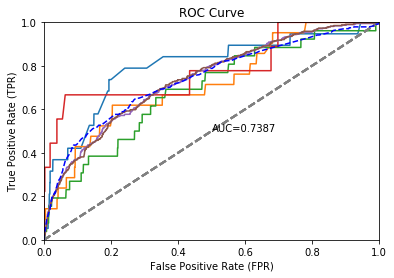

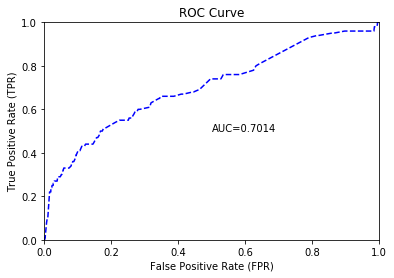

gbm prediction progress: |████████████████████████████████████████████████| 100%
 AUC is: 0.739263
 KS is: 0.37958
gbm prediction progress: |████████████████████████████████████████████████| 100%
 AUC is: 0.701184
 KS is: 0.33438


In [435]:
perf_gbm=best_gbm1.model_performance(train=True)  # Train ROC AUC 0.9543
perf_gbm_valid =best_gbm1.model_performance(valid)  # Valid ROC AUC 0.7271

perf_gbm.plot()
perf_gbm_valid.plot()

#### AUC_KS
AUC_KS(traindata['FUND_CNT'].as_data_frame(),best_gbm1.predict(traindata).as_data_frame()['p1'])
AUC_KS(valid['FUND_CNT'].as_data_frame(),best_gbm1.predict(valid).as_data_frame()['p1'])

In [436]:
best_gbm1.auc()

0.7386829671905347

#### 201804

In [437]:
pred_201804=best_gbm1.predict(h2o_df_P_201804).as_data_frame()

AUC_KS(h2o_df_P_201804_df['FUND_CNT'],pred_201804[['p1']])

data_201804=pd.concat([h2o_df_P_201804_df['FUND_CNT'],pred_201804[['p1']]],axis=1) 

MAPE(data_201804)

gbm prediction progress: |████████████████████████████████████████████████| 100%


C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset is missing column 'MedicalTitleGroup_r.CPA': substituting in a column of NaN
  warnings.warn(w)
C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset is missing column 'MedicalTitleGroup_r.CRNA': substituting in a column of NaN
  warnings.warn(w)
C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset is missing column 'MedicalTitleGroup_r.DDS': substituting in a column of NaN
  warnings.warn(w)
C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset is missing column 'MedicalTitleGroup_r.FA': substituting in a column of NaN
  warnings.warn(w)
C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset is missing column 'MedicalTitleGroup_r.MD': substituting in a column of NaN
  warnings.warn(w)
C:\ProgramData\Anaconda3\lib\site-packages\h2o

C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset is missing column 'Region.midwest': substituting in a column of NaN
  warnings.warn(w)
C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset is missing column 'Region.northeast': substituting in a column of NaN
  warnings.warn(w)
C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset is missing column 'Region.southeast': substituting in a column of NaN
  warnings.warn(w)
C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset is missing column 'Region.southwest': substituting in a column of NaN
  warnings.warn(w)
C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset is missing column 'Region.west': substituting in a column of NaN
  warnings.warn(w)
C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation 

 AUC is: 0.700171
 KS is: 0.38465
 MAPE is inf


,y_pred,n_positives,total,one_rate,abs_error
6,0.000647,1,1654,0.000605,0.007067
5,0.000390,4,11364,0.000352,0.010660
4,0.000303,9,32776,0.000275,0.010243
3,0.000181,2,8882,0.000225,0.019678
2,0.000159,0,3893,0.000000,inf
1,0.000153,1,17173,0.000058,0.163110
0,0.000146,2,41258,0.000048,0.201321


In [438]:
Margin(pd.concat([h2o_df_P_201804_df['FUND_CNT'],pred_201804[['p1']],h2o_df_P_201804_df['NEWMARGIN']],axis=1) )

,p1,NEWMARGIN,cumMargin,Percent
6,0.000647,13149.1,13149.1,0.049
5,0.000390,80370.9,93520.0,0.346
4,0.000303,103468.1,196988.1,0.728
3,0.000181,30610.4,227598.5,0.842
2,0.000159,0.0,227598.5,0.842
1,0.000153,23157.5,250756.0,0.927
0,0.000146,19691.2,270447.2,1.000


#### 201805

In [439]:
pred_201805=best_gbm1.predict(h2o_df_P_201805).as_data_frame()

AUC_KS(h2o_df_P_201805_df['FUND_CNT'],pred_201805[['p1']])

data_201805=pd.concat([h2o_df_P_201805_df['FUND_CNT'],pred_201805[['p1']]],axis=1) 

MAPE(data_201805)

gbm prediction progress: |████████████████████████████████████████████████| 100%


C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset is missing column 'MedicalTitleGroup_r.CPA': substituting in a column of NaN
  warnings.warn(w)
C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset is missing column 'MedicalTitleGroup_r.CRNA': substituting in a column of NaN
  warnings.warn(w)
C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset is missing column 'MedicalTitleGroup_r.DDS': substituting in a column of NaN
  warnings.warn(w)
C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset is missing column 'MedicalTitleGroup_r.FA': substituting in a column of NaN
  warnings.warn(w)
C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset is missing column 'MedicalTitleGroup_r.MD': substituting in a column of NaN
  warnings.warn(w)
C:\ProgramData\Anaconda3\lib\site-packages\h2o

C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset is missing column 'Region.midwest': substituting in a column of NaN
  warnings.warn(w)
C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset is missing column 'Region.northeast': substituting in a column of NaN
  warnings.warn(w)
C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset is missing column 'Region.southeast': substituting in a column of NaN
  warnings.warn(w)
C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset is missing column 'Region.southwest': substituting in a column of NaN
  warnings.warn(w)
C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset is missing column 'Region.west': substituting in a column of NaN
  warnings.warn(w)
C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation 

 AUC is: 0.698983
 KS is: 0.37082
 MAPE is 0.318213


,y_pred,n_positives,total,one_rate,abs_error
4,0.000274,8,9981,0.000802,0.065766
3,0.000168,3,11915,0.000252,0.033104
2,0.000159,1,9697,0.000103,0.054474
1,0.000153,2,26892,0.000074,0.106008
0,0.000146,7,76245,0.000092,0.058861


In [440]:
Margin(pd.concat([h2o_df_P_201805_df['FUND_CNT'],pred_201805[['p1']],h2o_df_P_201805_df['NEWMARGIN']],axis=1) )

,p1,NEWMARGIN,cumMargin,Percent
4,0.000274,68464.1,68464.1,0.207
3,0.000168,28861.8,97325.9,0.294
2,0.000159,85873.7,183199.6,0.553
1,0.000153,39749.1,222948.7,0.673
0,0.000146,108474.3,331423.0,1.000


#### 201806

In [441]:
pred_201806=best_gbm1.predict(h2o_df_P_201806).as_data_frame()

AUC_KS(h2o_df_P_201806_df['FUND_CNT'],pred_201806[['p1']])

data_201806=pd.concat([h2o_df_P_201806_df['FUND_CNT'],pred_201806[['p1']]],axis=1) 

MAPE(data_201806)

gbm prediction progress: |████████████████████████████████████████████████| 100%
 AUC is: 0.602119
 KS is: 0.33298
 MAPE is 1.29676


,y_pred,n_positives,total,one_rate,abs_error
8,0.000829,6,19540,0.000307,0.169815
7,0.000206,5,19129,0.000261,0.021363
6,0.000187,3,2945,0.001019,0.081614
5,0.000180,2,35036,0.000057,0.215889
4,0.000165,1,17887,0.000056,0.194884
3,0.000157,1,16772,0.000060,0.162546
2,0.000153,1,16693,0.000060,0.155180
1,0.000149,2,47196,0.000042,0.251090
0,0.000133,5,20930,0.000239,0.044380


In [442]:
Margin(pd.concat([h2o_df_P_201806_df['FUND_CNT'],pred_201806[['p1']],h2o_df_P_201806_df['NEWMARGIN']],axis=1) )

,p1,NEWMARGIN,cumMargin,Percent
8,0.000829,68079.4,68079.4,0.179
7,0.000206,91104.2,159183.6,0.418
6,0.000187,76541.0,235724.6,0.620
5,0.000180,25922.2,261646.8,0.688
4,0.000165,3756.9,265403.7,0.698
3,0.000157,10123.8,275527.5,0.724
2,0.000153,27793.9,303321.4,0.797
1,0.000149,2886.6,306208.0,0.805
0,0.000133,74229.5,380437.5,1.000


#### 201807

In [443]:
pred_201807=best_gbm1.predict(h2o_df_P_201807).as_data_frame()

AUC_KS(h2o_df_P_201807_df['FUND_CNT'],pred_201807[['p1']])

data_201807=pd.concat([h2o_df_P_201807_df['FUND_CNT'],pred_201807['p1']],axis=1) 

MAPE(data_201807)

gbm prediction progress: |████████████████████████████████████████████████| 100%
 AUC is: 0.759914
 KS is: 0.57237
 MAPE is inf


,y_pred,n_positives,total,one_rate,abs_error
7,0.175327,0,3917,0.000000,inf
6,0.063441,6,11030,0.000544,11.562643
5,0.000228,1,6513,0.000154,0.048551
4,0.000197,1,16501,0.000061,0.225178
3,0.000170,0,7526,0.000000,inf
2,0.000155,1,6095,0.000164,0.005250
1,0.000148,0,16708,0.000000,inf
0,0.000076,0,7642,0.000000,inf


In [444]:
Margin(pd.concat([h2o_df_P_201807_df['FUND_CNT'],pred_201807[['p1']],h2o_df_P_201807_df['NEWMARGIN']],axis=1) )

,p1,NEWMARGIN,cumMargin,Percent
7,0.175327,0.0,0.0,0.000
6,0.063441,163122.1,163122.1,0.938
5,0.000228,1608.4,164730.5,0.947
4,0.000197,5503.1,170233.6,0.979
3,0.000170,0.0,170233.6,0.979
2,0.000155,3737.4,173971.0,1.000
1,0.000148,0.0,173971.0,1.000
0,0.000076,0.0,173971.0,1.000


In [82]:
model_path = h2o.save_model(model=best_gbm1, force=True)
print(model_path)

C:\Users\xiaoxima\Xiaoxi_Python\Model C\Model C


### Full dataset

In [98]:
aaa=best_gbm1.predict(h2o_DnB_F_model)

gbm prediction progress: |████████████████████████████████████████████████| 100%


C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset column 'CHIEF_EXECUTIVE_OFFICER_-_TITLE' has levels not trained on: [Accountant, Acting CEO, Adjutant, Assistant Manager, Chief Technology Officer, Commander, Finance Staff, Marketing Director, Marketing Manager, Nurse, Office Administrator, Orthopedist, Otolaryngologist, Producer, Purchasing Agent, Reverend, Sales And Marketing Executive, Senior Manager, Technician, Trustee, VP Human Resources, VP Marketing]
  warnings.warn(w)
C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset column 'CREDIT_RATING' has levels not trained on: [BA1, BB1, CC3]
  warnings.warn(w)
C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset column 'MedicalTitle' has levels not trained on: [CHE, DN, DPSM]
  warnings.warn(w)
C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset column 'ADDRESSTYPE

In [106]:
bbb=pd.concat([aaa.as_data_frame(),DnB_F1],axis=1)
bbb.to_csv('H:/1_Xiaoxi_Ma_Project/Model C/Dataset/csv/GBM/all1.csv')

In [ ]:
import sys
sys.path.insert(1,"../../")

import math


def partial_plot_test():
    kwargs = {}
    kwargs['server'] = True



    # Plot Partial Dependence for one feature then for both
    pdp1=best_gbm1.partial_plot(data=data,cols=['AGE'],server=True, plot=True)
    #Manual test
    h2o_mean_response_pdp1 = pdp1[0]["mean_response"]
    h2o_stddev_response_pdp1 = pdp1[0]["stddev_response"]
    h2o_std_error_mean_response_pdp1 = pdp1[0]["std_error_mean_response"]
    pdp_manual = partial_dependence(best_gbm1, data, "AGE", pdp1, 0)

    assert h2o_mean_response_pdp1 == pdp_manual[0]
    assert h2o_stddev_response_pdp1 == pdp_manual[1]
    assert h2o_std_error_mean_response_pdp1 == pdp_manual[2]

    pdp2=best_gbm1.partial_plot(data=data,cols=['AGE'    ,'RACE'], server=True, plot=False)
    #Manual test
    h2o_mean_response_pdp2 = pdp2[0]["mean_response"]
    h2o_stddev_response_pdp2 = pdp2[0]["stddev_response"]
    h2o_std_error_mean_response_pdp2 = pdp2[0]["std_error_mean_response"]
    pdp_manual = partial_dependence(best_gbm1, data, "AGE", pdp2, 0)

    assert h2o_mean_response_pdp2 == pdp_manual[0]
    assert h2o_stddev_response_pdp2 == pdp_manual[1]
    assert h2o_std_error_mean_response_pdp2 == pdp_manual[2]

    #Manual test
    h2o_mean_response_pdp2_race = pdp2[1]["mean_response"]
    h2o_stddev_response_pdp2_race = pdp2[1]["stddev_response"]
    h2o_std_error_mean_response_pdp2_race = pdp2[1]["std_error_mean_response"]
    pdp_manual = partial_dependence(best_gbm1, data, "RACE", pdp2, 1)

    assert h2o_mean_response_pdp2_race == pdp_manual[0]
    assert h2o_stddev_response_pdp2_race == pdp_manual[1]
    assert h2o_std_error_mean_response_pdp2_race == pdp_manual[2]

def partial_dependence(object, pred_data, xname, h2o_pp, pdp_name_idx):
    x_pt = h2o_pp[pdp_name_idx][xname.lower()] #Needs to be lower case here as the PDP response sets everything to lower
    y_pt = list(range(len(x_pt)))
    y_sd = list(range(len(x_pt)))
    y_sem = list(range(len(x_pt)))

    for i in range(len(x_pt)):
        x_data = pred_data
        x_data[xname] = x_pt[i]
        pred = object.predict(x_data)["p1"]
        y_pt[i] = pred.mean()[0,0]
        y_sd[i] = pred.sd()[0]
        y_sem[i] = y_sd[i]/math.sqrt(x_data.nrows)

    return y_pt, y_sd, y_sem

if __name__ == "__main__":
    pyunit_utils.standalone_test(partial_plot_test)
else:
    partial_plot_test()